In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle #-,kaggle

In [3]:
! cp /content/drive/MyDrive/Colab\ Notebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/


In [4]:
! kaggle datasets download tanlikesmath/diabetic-retinopathy-resized

100% 7.25G/7.25G [04:11<00:00, 40.3MB/s]
100% 7.25G/7.25G [04:11<00:00, 31.0MB/s]


In [5]:
!unzip diabetic-retinopathy-resized.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized_train_cropped/resized_train_cropped/44260_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44267_left.jpeg  
  inflating: resized_train_cropped/resized_

In [6]:
import io
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import tensorflow as tf
from keras.utils import normalize, to_categorical
import shutil

plt.style.use("ggplot")
%matplotlib inline

In [7]:
csv_file      = 'trainLabels.csv'
dataset_path = os.path.join('/content','resized_train','resized_train')

In [8]:
def collect_random_dataset(dataset_path,csv_file,num_sample):

    #csv_file_path = os.path.join('eye_dataset',csv_file)
    data = pd.read_csv(csv_file)

    value_list = data['level'].value_counts().index.tolist()

    index_value = []

    for value in value_list:
        data_value = data[data['level'] == value].index
        index_value.append(data_value)

    full_index = []

    for indices in index_value:
        data_list = random.sample(indices.tolist(), num_sample)
        full_index.extend(data_list)

    random_data = data.iloc[full_index]

    image_ = []
    level_ = []

    for ind,(image,level) in random_data.iterrows():
        image_path = os.path.join(dataset_path,f'{image}.jpeg')
        image_.append(image_path)
        level_.append(level)

    return image_,level_

In [9]:
image,level = collect_random_dataset(dataset_path,csv_file,num_sample=350)

In [10]:
image

['/content/resized_train/resized_train/1133_left.jpeg',
 '/content/resized_train/resized_train/43079_left.jpeg',
 '/content/resized_train/resized_train/13875_left.jpeg',
 '/content/resized_train/resized_train/31889_left.jpeg',
 '/content/resized_train/resized_train/18673_right.jpeg',
 '/content/resized_train/resized_train/18905_right.jpeg',
 '/content/resized_train/resized_train/34785_left.jpeg',
 '/content/resized_train/resized_train/41708_left.jpeg',
 '/content/resized_train/resized_train/33960_right.jpeg',
 '/content/resized_train/resized_train/7445_left.jpeg',
 '/content/resized_train/resized_train/21807_left.jpeg',
 '/content/resized_train/resized_train/1411_left.jpeg',
 '/content/resized_train/resized_train/42721_left.jpeg',
 '/content/resized_train/resized_train/6822_right.jpeg',
 '/content/resized_train/resized_train/17581_right.jpeg',
 '/content/resized_train/resized_train/8297_right.jpeg',
 '/content/resized_train/resized_train/20178_right.jpeg',
 '/content/resized_train/resi

In [11]:
level

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [12]:
def convert_into_array(image,level):
    level = np.array(level,dtype=float)
    level = to_categorical(level,num_classes=5)
    #file = tf.squeeze(file,axis=0)
    return image,level

In [13]:
image_path,level = convert_into_array(image,level)

In [14]:
def Normalization(image,level):

    image   = tf.image.resize(image,(224,224))
    mean_per_channel = tf.reduce_mean(image, axis=(0, 1))
    std_per_channel  = tf.math.reduce_std(image,axis=(0,1))

    epsilon = 1e-8
    std_per_channel = tf.maximum(std_per_channel, epsilon)

    # Normalize each channel by subtracting its respective channel mean from each pixel value
    normalized_rgb_image = image - mean_per_channel
    normalized_rgb_image = normalized_rgb_image/std_per_channel

    return normalized_rgb_image,level

In [15]:
def preprocess(image_path, level):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))  # Adjust dimensions
    image = image / 255.0  # Normalize pixel values

    nor_image,level = Normalization(image,level)
    return nor_image, level

In [16]:
data = tf.data.Dataset.from_tensor_slices((image_path, level))
data = data.shuffle(buffer_size=12452)
data = data.map(preprocess)
data = data.batch(16)
data = data.prefetch(tf.data.AUTOTUNE)

In [17]:
sample = data.as_numpy_iterator().next()

In [18]:
sample[0].shape

(16, 224, 224, 3)

In [19]:
train_data = data.take(77)
test_data  = data.skip(77)
val_data   = test_data.skip(11)

In [20]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate,Conv2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,LearningRateScheduler
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg19 import VGG19

In [21]:
early_stop    = EarlyStopping(monitor='val_loss',patience=25,verbose=1)
checkpoint_cb = ModelCheckpoint("Vgg19_model.h5",save_best_only=True)

In [22]:
def scheduler(epoch, lr):
    if epoch < 200:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [23]:
schedule_callback = LearningRateScheduler(scheduler)

In [24]:
from sklearn.metrics import  cohen_kappa_score

In [25]:
base_model = VGG19(weights=None, include_top=False, input_shape=(224, 224, 3))

# Customize the top layers
x = base_model.output
x = Flatten()(x)
x = Dense(16, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)  # Assuming 5 classes in your dataset

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = RMSprop(learning_rate=0.001, centered=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','AUC' ])


In [26]:
history = model.fit(train_data,validation_data=test_data,epochs=300,
                    callbacks=[early_stop,checkpoint_cb,schedule_callback])

Epoch 1/300
77/77 [==============================] - ETA: 0s - loss: 2.0848 - accuracy: 0.1656 - auc: 0.4783

77/77 [==============================] - 26s 112ms/step - loss: 2.0848 - accuracy: 0.1656 - auc: 0.4783 - val_loss: 6.9627 - val_accuracy: 0.2085 - val_auc: 0.5032 - lr: 0.0010
Epoch 2/300
77/77 [==============================] - ETA: 0s - loss: 1.8682 - accuracy: 0.2094 - auc: 0.5039

77/77 [==============================] - 8s 104ms/step - loss: 1.8682 - accuracy: 0.2094 - auc: 0.5039 - val_loss: 3.6423 - val_accuracy: 0.2201 - val_auc: 0.5058 - lr: 0.0010
Epoch 3/300
76/77 [============================>.] - ETA: 0s - loss: 1.7983 - accuracy: 0.1949 - auc: 0.5094

77/77 [==============================] - 8s 99ms/step - loss: 1.7978 - accuracy: 0.1940 - auc: 0.5089 - val_loss: 2.9773 - val_accuracy: 0.1660 - val_auc: 0.4949 - lr: 0.0010
Epoch 4/300
77/77 [==============================] - ETA: 0s - loss: 1.7507 - accuracy: 0.2029 - auc: 0.5062

77/77 [==============================] - 8s 104ms/step - loss: 1.7507 - accuracy: 0.2029 - auc: 0.5062 - val_loss: 2.5718 - val_accuracy: 0.2104 - val_auc: 0.5198 - lr: 0.0010
Epoch 5/300
77/77 [==============================] - ETA: 0s - loss: 1.7335 - accuracy: 0.1875 - auc: 0.4927

77/77 [==============================] - 8s 103ms/step - loss: 1.7335 - accuracy: 0.1875 - auc: 0.4927 - val_loss: 2.2379 - val_accuracy: 0.2529 - val_auc: 0.5415 - lr: 0.0010
Epoch 6/300
77/77 [==============================] - ETA: 0s - loss: 1.6951 - accuracy: 0.1948 - auc: 0.4980

77/77 [==============================] - 8s 99ms/step - loss: 1.6951 - accuracy: 0.1948 - auc: 0.4980 - val_loss: 1.7985 - val_accuracy: 0.2278 - val_auc: 0.5354 - lr: 0.0010
Epoch 7/300
77/77 [==============================] - ETA: 0s - loss: 1.6724 - accuracy: 0.2208 - auc: 0.5071

77/77 [==============================] - 8s 104ms/step - loss: 1.6724 - accuracy: 0.2208 - auc: 0.5071 - val_loss: 1.7297 - val_accuracy: 0.2162 - val_auc: 0.5329 - lr: 0.0010
Epoch 8/300
77/77 [==============================] - ETA: 0s - loss: 1.6484 - accuracy: 0.2102 - auc: 0.5240

77/77 [==============================] - 8s 99ms/step - loss: 1.6484 - accuracy: 0.2102 - auc: 0.5240 - val_loss: 1.6231 - val_accuracy: 0.2201 - val_auc: 0.5395 - lr: 0.0010
Epoch 9/300
77/77 [==============================] - ETA: 0s - loss: 1.6427 - accuracy: 0.2167 - auc: 0.5295

77/77 [==============================] - 8s 103ms/step - loss: 1.6427 - accuracy: 0.2167 - auc: 0.5295 - val_loss: 1.5842 - val_accuracy: 0.2336 - val_auc: 0.5740 - lr: 0.0010
Epoch 10/300
77/77 [==============================] - 4s 52ms/step - loss: 1.6353 - accuracy: 0.2086 - auc: 0.5285 - val_loss: 1.5977 - val_accuracy: 0.2625 - val_auc: 0.5718 - lr: 0.0010
Epoch 11/300
77/77 [==============================] - 4s 53ms/step - loss: 1.6215 - accuracy: 0.2273 - auc: 0.5358 - val_loss: 1.6096 - val_accuracy: 0.2124 - val_auc: 0.5094 - lr: 0.0010
Epoch 12/300
77/77 [==============================] - 4s 51ms/step - loss: 1.6343 - accuracy: 0.2338 - auc: 0.5228 - val_loss: 1.6579 - val_accuracy: 0.2413 - val_auc: 0.5432 - lr: 0.0010
Epoch 13/300
77/77 [==============================] - 4s 52ms/step - loss: 1.6201 - accuracy: 0.2200 - auc: 0.5338 - val_loss: 1.6176 - val_accuracy: 0.1969 - val_auc: 0.5005 - lr: 0.0010
Epoch 14/300
77/77 [==============================] - 4s 53ms/step - los

77/77 [==============================] - 7s 98ms/step - loss: 1.6001 - accuracy: 0.2435 - auc: 0.5539 - val_loss: 1.5783 - val_accuracy: 0.2259 - val_auc: 0.5743 - lr: 0.0010
Epoch 17/300
77/77 [==============================] - 4s 53ms/step - loss: 1.6007 - accuracy: 0.2484 - auc: 0.5495 - val_loss: 1.7648 - val_accuracy: 0.2317 - val_auc: 0.5416 - lr: 0.0010
Epoch 18/300
77/77 [==============================] - 4s 52ms/step - loss: 1.6054 - accuracy: 0.2321 - auc: 0.5398 - val_loss: 1.6016 - val_accuracy: 0.2162 - val_auc: 0.5486 - lr: 0.0010
Epoch 19/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5967 - accuracy: 0.2435 - auc: 0.5585 - val_loss: 1.6012 - val_accuracy: 0.2278 - val_auc: 0.5532 - lr: 0.0010
Epoch 20/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5948 - accuracy: 0.2378 - auc: 0.5555 - val_loss: 1.5966 - val_accuracy: 0.2529 - val_auc: 0.5535 - lr: 0.0010
Epoch 21/300
77/77 [==============================] - 4s 52ms/step - loss

77/77 [==============================] - 8s 102ms/step - loss: 1.5902 - accuracy: 0.2719 - auc: 0.5683 - val_loss: 1.5599 - val_accuracy: 0.3050 - val_auc: 0.6235 - lr: 0.0010
Epoch 23/300
77/77 [==============================] - 4s 52ms/step - loss: 1.6025 - accuracy: 0.2532 - auc: 0.5540 - val_loss: 1.6036 - val_accuracy: 0.2259 - val_auc: 0.5320 - lr: 0.0010
Epoch 24/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5963 - accuracy: 0.2565 - auc: 0.5537 - val_loss: 1.5861 - val_accuracy: 0.2587 - val_auc: 0.5649 - lr: 0.0010
Epoch 25/300
77/77 [==============================] - 4s 53ms/step - loss: 1.5916 - accuracy: 0.2508 - auc: 0.5545 - val_loss: 1.5836 - val_accuracy: 0.2490 - val_auc: 0.5621 - lr: 0.0010
Epoch 26/300
77/77 [==============================] - 4s 51ms/step - loss: 1.5910 - accuracy: 0.2532 - auc: 0.5667 - val_loss: 1.5874 - val_accuracy: 0.2471 - val_auc: 0.5754 - lr: 0.0010
Epoch 27/300
77/77 [==============================] - 4s 52ms/step - los

77/77 [==============================] - 8s 103ms/step - loss: 1.5730 - accuracy: 0.2638 - auc: 0.5801 - val_loss: 1.5575 - val_accuracy: 0.2954 - val_auc: 0.6069 - lr: 0.0010
Epoch 46/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5867 - accuracy: 0.2492 - auc: 0.5794 - val_loss: 2.1301 - val_accuracy: 0.2413 - val_auc: 0.5400 - lr: 0.0010
Epoch 47/300
77/77 [==============================] - 4s 53ms/step - loss: 1.5864 - accuracy: 0.2597 - auc: 0.5727 - val_loss: 2.3670 - val_accuracy: 0.2181 - val_auc: 0.5380 - lr: 0.0010
Epoch 48/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5782 - accuracy: 0.2695 - auc: 0.5866 - val_loss: 1.7302 - val_accuracy: 0.2355 - val_auc: 0.5648 - lr: 0.0010
Epoch 49/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5741 - accuracy: 0.2727 - auc: 0.5801 - val_loss: 1.5887 - val_accuracy: 0.2683 - val_auc: 0.5691 - lr: 0.0010
Epoch 50/300
77/77 [==============================] - 4s 54ms/step - los

77/77 [==============================] - 8s 99ms/step - loss: 1.5510 - accuracy: 0.2890 - auc: 0.6105 - val_loss: 1.5358 - val_accuracy: 0.2896 - val_auc: 0.6036 - lr: 0.0010
Epoch 56/300
77/77 [==============================] - 4s 53ms/step - loss: 1.5550 - accuracy: 0.2679 - auc: 0.6032 - val_loss: 1.6090 - val_accuracy: 0.2413 - val_auc: 0.5532 - lr: 0.0010
Epoch 57/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5601 - accuracy: 0.2881 - auc: 0.6074 - val_loss: 7.7687 - val_accuracy: 0.2066 - val_auc: 0.5134 - lr: 0.0010
Epoch 58/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5478 - accuracy: 0.3044 - auc: 0.6220 - val_loss: 1.6347 - val_accuracy: 0.2297 - val_auc: 0.5413 - lr: 0.0010
Epoch 59/300
77/77 [==============================] - 4s 53ms/step - loss: 1.5419 - accuracy: 0.3036 - auc: 0.6171 - val_loss: 8.6240 - val_accuracy: 0.2008 - val_auc: 0.4988 - lr: 0.0010
Epoch 60/300
76/77 [============================>.] - ETA: 0s - loss: 1.5

77/77 [==============================] - 8s 102ms/step - loss: 1.5262 - accuracy: 0.2841 - auc: 0.6254 - val_loss: 1.4841 - val_accuracy: 0.3475 - val_auc: 0.6741 - lr: 0.0010
Epoch 61/300
77/77 [==============================] - 4s 53ms/step - loss: 1.5525 - accuracy: 0.2971 - auc: 0.6265 - val_loss: 1.5356 - val_accuracy: 0.3166 - val_auc: 0.6337 - lr: 0.0010
Epoch 62/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5441 - accuracy: 0.2963 - auc: 0.6178 - val_loss: 1.5782 - val_accuracy: 0.2471 - val_auc: 0.5769 - lr: 0.0010
Epoch 63/300
77/77 [==============================] - 4s 52ms/step - loss: 1.5483 - accuracy: 0.2898 - auc: 0.6265 - val_loss: 1.5294 - val_accuracy: 0.2645 - val_auc: 0.6245 - lr: 0.0010
Epoch 64/300
77/77 [==============================] - 4s 53ms/step - loss: 1.5287 - accuracy: 0.3101 - auc: 0.6368 - val_loss: 4.7219 - val_accuracy: 0.2027 - val_auc: 0.5159 - lr: 0.0010
Epoch 65/300
77/77 [==============================] - 4s 52ms/step - los

77/77 [==============================] - 8s 98ms/step - loss: 1.5030 - accuracy: 0.3222 - auc: 0.6573 - val_loss: 1.4623 - val_accuracy: 0.3494 - val_auc: 0.6939 - lr: 0.0010
Epoch 74/300
77/77 [==============================] - 4s 52ms/step - loss: 1.4780 - accuracy: 0.3320 - auc: 0.6791 - val_loss: 1.5799 - val_accuracy: 0.2741 - val_auc: 0.6103 - lr: 0.0010
Epoch 75/300
77/77 [==============================] - ETA: 0s - loss: 1.4590 - accuracy: 0.3328 - auc: 0.6783

77/77 [==============================] - 8s 103ms/step - loss: 1.4590 - accuracy: 0.3328 - auc: 0.6783 - val_loss: 1.4361 - val_accuracy: 0.3610 - val_auc: 0.7111 - lr: 0.0010
Epoch 76/300
77/77 [==============================] - 4s 52ms/step - loss: 1.4978 - accuracy: 0.3166 - auc: 0.6637 - val_loss: 1.7477 - val_accuracy: 0.2336 - val_auc: 0.6111 - lr: 0.0010
Epoch 77/300
77/77 [==============================] - 4s 53ms/step - loss: 1.4591 - accuracy: 0.3182 - auc: 0.6912 - val_loss: 1.9137 - val_accuracy: 0.2432 - val_auc: 0.6013 - lr: 0.0010
Epoch 78/300
77/77 [==============================] - 4s 53ms/step - loss: 1.4687 - accuracy: 0.3336 - auc: 0.6805 - val_loss: 1.5511 - val_accuracy: 0.2819 - val_auc: 0.6266 - lr: 0.0010
Epoch 79/300
77/77 [==============================] - 4s 52ms/step - loss: 1.4556 - accuracy: 0.3247 - auc: 0.6919 - val_loss: 1.4955 - val_accuracy: 0.3031 - val_auc: 0.6558 - lr: 0.0010
Epoch 80/300
77/77 [==============================] - 4s 52ms/step - los

77/77 [==============================] - 8s 107ms/step - loss: 1.4423 - accuracy: 0.3628 - auc: 0.6986 - val_loss: 1.3590 - val_accuracy: 0.4170 - val_auc: 0.7397 - lr: 0.0010
Epoch 86/300
77/77 [==============================] - 4s 52ms/step - loss: 1.4374 - accuracy: 0.3531 - auc: 0.7007 - val_loss: 1.9997 - val_accuracy: 0.2548 - val_auc: 0.6000 - lr: 0.0010
Epoch 87/300
77/77 [==============================] - 4s 53ms/step - loss: 1.4310 - accuracy: 0.3531 - auc: 0.7097 - val_loss: 1.4058 - val_accuracy: 0.3668 - val_auc: 0.7243 - lr: 0.0010
Epoch 88/300
77/77 [==============================] - ETA: 0s - loss: 1.4427 - accuracy: 0.3482 - auc: 0.7061

77/77 [==============================] - 7s 98ms/step - loss: 1.4427 - accuracy: 0.3482 - auc: 0.7061 - val_loss: 1.3306 - val_accuracy: 0.3861 - val_auc: 0.7573 - lr: 0.0010
Epoch 89/300
77/77 [==============================] - 4s 55ms/step - loss: 1.4233 - accuracy: 0.3466 - auc: 0.7131 - val_loss: 1.8351 - val_accuracy: 0.2587 - val_auc: 0.6145 - lr: 0.0010
Epoch 90/300
77/77 [==============================] - 4s 52ms/step - loss: 1.4201 - accuracy: 0.3482 - auc: 0.7112 - val_loss: 1.3797 - val_accuracy: 0.3938 - val_auc: 0.7411 - lr: 0.0010
Epoch 91/300
77/77 [==============================] - ETA: 0s - loss: 1.3952 - accuracy: 0.3766 - auc: 0.7283

77/77 [==============================] - 8s 103ms/step - loss: 1.3952 - accuracy: 0.3766 - auc: 0.7283 - val_loss: 1.2926 - val_accuracy: 0.4093 - val_auc: 0.7748 - lr: 0.0010
Epoch 92/300
77/77 [==============================] - 4s 53ms/step - loss: 1.3931 - accuracy: 0.3620 - auc: 0.7258 - val_loss: 1.7672 - val_accuracy: 0.2510 - val_auc: 0.6006 - lr: 0.0010
Epoch 93/300
77/77 [==============================] - 4s 52ms/step - loss: 1.4047 - accuracy: 0.3734 - auc: 0.7198 - val_loss: 1.7807 - val_accuracy: 0.2568 - val_auc: 0.5991 - lr: 0.0010
Epoch 94/300
77/77 [==============================] - 4s 52ms/step - loss: 1.3901 - accuracy: 0.3791 - auc: 0.7292 - val_loss: 1.6939 - val_accuracy: 0.2568 - val_auc: 0.6109 - lr: 0.0010
Epoch 95/300
77/77 [==============================] - 4s 53ms/step - loss: 1.3854 - accuracy: 0.3709 - auc: 0.7279 - val_loss: 1.4066 - val_accuracy: 0.3629 - val_auc: 0.7139 - lr: 0.0010
Epoch 96/300
77/77 [==============================] - 4s 53ms/step - los

77/77 [==============================] - 8s 103ms/step - loss: 1.3770 - accuracy: 0.3799 - auc: 0.7369 - val_loss: 1.2815 - val_accuracy: 0.4324 - val_auc: 0.7785 - lr: 0.0010
Epoch 101/300
77/77 [==============================] - 4s 54ms/step - loss: 1.3613 - accuracy: 0.3677 - auc: 0.7460 - val_loss: 1.3825 - val_accuracy: 0.3649 - val_auc: 0.7301 - lr: 0.0010
Epoch 102/300
77/77 [==============================] - 4s 54ms/step - loss: 1.3682 - accuracy: 0.3969 - auc: 0.7440 - val_loss: 1.3324 - val_accuracy: 0.3919 - val_auc: 0.7437 - lr: 0.0010
Epoch 103/300
77/77 [==============================] - 4s 54ms/step - loss: 1.3435 - accuracy: 0.3823 - auc: 0.7525 - val_loss: 1.9470 - val_accuracy: 0.2297 - val_auc: 0.5951 - lr: 0.0010
Epoch 104/300
77/77 [==============================] - 4s 52ms/step - loss: 1.3435 - accuracy: 0.3701 - auc: 0.7456 - val_loss: 1.2910 - val_accuracy: 0.4170 - val_auc: 0.7676 - lr: 0.0010
Epoch 105/300
77/77 [==============================] - 4s 52ms/step 

77/77 [==============================] - 8s 105ms/step - loss: 1.2834 - accuracy: 0.4156 - auc: 0.7750 - val_loss: 1.2401 - val_accuracy: 0.4286 - val_auc: 0.7875 - lr: 0.0010
Epoch 110/300
77/77 [==============================] - 4s 53ms/step - loss: 1.2983 - accuracy: 0.4026 - auc: 0.7669 - val_loss: 1.2691 - val_accuracy: 0.4421 - val_auc: 0.7890 - lr: 0.0010
Epoch 111/300
77/77 [==============================] - 4s 53ms/step - loss: 1.2986 - accuracy: 0.4261 - auc: 0.7679 - val_loss: 1.2590 - val_accuracy: 0.4054 - val_auc: 0.7810 - lr: 0.0010
Epoch 112/300
77/77 [==============================] - 4s 54ms/step - loss: 1.3080 - accuracy: 0.3880 - auc: 0.7662 - val_loss: 1.5377 - val_accuracy: 0.3745 - val_auc: 0.7069 - lr: 0.0010
Epoch 113/300
77/77 [==============================] - 4s 52ms/step - loss: 1.2617 - accuracy: 0.4302 - auc: 0.7829 - val_loss: 1.3829 - val_accuracy: 0.3475 - val_auc: 0.7332 - lr: 0.0010
Epoch 114/300
77/77 [==============================] - 4s 52ms/step 

77/77 [==============================] - 8s 99ms/step - loss: 1.2655 - accuracy: 0.4521 - auc: 0.7844 - val_loss: 1.2320 - val_accuracy: 0.4614 - val_auc: 0.7888 - lr: 0.0010
Epoch 121/300
77/77 [==============================] - 4s 53ms/step - loss: 1.2436 - accuracy: 0.4253 - auc: 0.7919 - val_loss: 1.2432 - val_accuracy: 0.4556 - val_auc: 0.7995 - lr: 0.0010
Epoch 122/300
77/77 [==============================] - 4s 53ms/step - loss: 1.2301 - accuracy: 0.4375 - auc: 0.7955 - val_loss: 1.7480 - val_accuracy: 0.2876 - val_auc: 0.6567 - lr: 0.0010
Epoch 123/300
77/77 [==============================] - 4s 52ms/step - loss: 1.2499 - accuracy: 0.4091 - auc: 0.7868 - val_loss: 1.3707 - val_accuracy: 0.3977 - val_auc: 0.7660 - lr: 0.0010
Epoch 124/300
77/77 [==============================] - ETA: 0s - loss: 1.2444 - accuracy: 0.4269 - auc: 0.7885

77/77 [==============================] - 8s 104ms/step - loss: 1.2444 - accuracy: 0.4269 - auc: 0.7885 - val_loss: 1.1057 - val_accuracy: 0.4961 - val_auc: 0.8422 - lr: 0.0010
Epoch 125/300
77/77 [==============================] - 4s 53ms/step - loss: 1.2516 - accuracy: 0.4416 - auc: 0.7905 - val_loss: 1.6231 - val_accuracy: 0.3147 - val_auc: 0.6978 - lr: 0.0010
Epoch 126/300
77/77 [==============================] - 4s 53ms/step - loss: 1.2312 - accuracy: 0.4334 - auc: 0.7918 - val_loss: 1.2514 - val_accuracy: 0.4807 - val_auc: 0.7907 - lr: 0.0010
Epoch 127/300
77/77 [==============================] - 4s 52ms/step - loss: 1.2018 - accuracy: 0.4448 - auc: 0.8000 - val_loss: 1.3622 - val_accuracy: 0.3977 - val_auc: 0.7557 - lr: 0.0010
Epoch 128/300
77/77 [==============================] - 4s 52ms/step - loss: 1.2138 - accuracy: 0.4505 - auc: 0.8054 - val_loss: 1.1359 - val_accuracy: 0.4730 - val_auc: 0.8318 - lr: 0.0010
Epoch 129/300
77/77 [==============================] - 4s 53ms/step 

77/77 [==============================] - 8s 99ms/step - loss: 1.1835 - accuracy: 0.4513 - auc: 0.8101 - val_loss: 1.0515 - val_accuracy: 0.5212 - val_auc: 0.8499 - lr: 0.0010
Epoch 132/300
77/77 [==============================] - 4s 52ms/step - loss: 1.1846 - accuracy: 0.4432 - auc: 0.8068 - val_loss: 2.4163 - val_accuracy: 0.2915 - val_auc: 0.6435 - lr: 0.0010
Epoch 133/300
77/77 [==============================] - 4s 52ms/step - loss: 1.1619 - accuracy: 0.4700 - auc: 0.8182 - val_loss: 1.3643 - val_accuracy: 0.4247 - val_auc: 0.7716 - lr: 0.0010
Epoch 134/300
77/77 [==============================] - ETA: 0s - loss: 1.1604 - accuracy: 0.4748 - auc: 0.8236

77/77 [==============================] - 8s 106ms/step - loss: 1.1604 - accuracy: 0.4748 - auc: 0.8236 - val_loss: 1.0202 - val_accuracy: 0.5734 - val_auc: 0.8606 - lr: 0.0010
Epoch 135/300
77/77 [==============================] - 4s 52ms/step - loss: 1.1684 - accuracy: 0.4635 - auc: 0.8149 - val_loss: 1.0543 - val_accuracy: 0.5483 - val_auc: 0.8509 - lr: 0.0010
Epoch 136/300
77/77 [==============================] - 4s 52ms/step - loss: 1.1841 - accuracy: 0.4756 - auc: 0.8127 - val_loss: 1.3007 - val_accuracy: 0.4556 - val_auc: 0.7800 - lr: 0.0010
Epoch 137/300
76/77 [============================>.] - ETA: 0s - loss: 1.1335 - accuracy: 0.4868 - auc: 0.8254

77/77 [==============================] - 8s 103ms/step - loss: 1.1364 - accuracy: 0.4854 - auc: 0.8249 - val_loss: 0.9895 - val_accuracy: 0.5560 - val_auc: 0.8726 - lr: 0.0010
Epoch 138/300
77/77 [==============================] - 4s 52ms/step - loss: 1.1822 - accuracy: 0.4562 - auc: 0.8089 - val_loss: 1.1888 - val_accuracy: 0.3977 - val_auc: 0.8012 - lr: 0.0010
Epoch 139/300
77/77 [==============================] - 4s 53ms/step - loss: 1.1503 - accuracy: 0.4692 - auc: 0.8195 - val_loss: 1.0382 - val_accuracy: 0.5019 - val_auc: 0.8504 - lr: 0.0010
Epoch 140/300
77/77 [==============================] - ETA: 0s - loss: 1.1103 - accuracy: 0.4821 - auc: 0.8321

77/77 [==============================] - 7s 98ms/step - loss: 1.1103 - accuracy: 0.4821 - auc: 0.8321 - val_loss: 0.9642 - val_accuracy: 0.5560 - val_auc: 0.8805 - lr: 0.0010
Epoch 141/300
77/77 [==============================] - 4s 54ms/step - loss: 1.0897 - accuracy: 0.4935 - auc: 0.8398 - val_loss: 1.1439 - val_accuracy: 0.4826 - val_auc: 0.8224 - lr: 0.0010
Epoch 142/300
77/77 [==============================] - 4s 52ms/step - loss: 1.0937 - accuracy: 0.5065 - auc: 0.8370 - val_loss: 1.2304 - val_accuracy: 0.4865 - val_auc: 0.8172 - lr: 0.0010
Epoch 143/300
77/77 [==============================] - ETA: 0s - loss: 1.1288 - accuracy: 0.4943 - auc: 0.8319

77/77 [==============================] - 8s 102ms/step - loss: 1.1288 - accuracy: 0.4943 - auc: 0.8319 - val_loss: 0.9382 - val_accuracy: 0.5637 - val_auc: 0.8811 - lr: 0.0010
Epoch 144/300
77/77 [==============================] - 4s 53ms/step - loss: 1.0937 - accuracy: 0.4765 - auc: 0.8327 - val_loss: 0.9820 - val_accuracy: 0.5483 - val_auc: 0.8742 - lr: 0.0010
Epoch 145/300
77/77 [==============================] - 4s 52ms/step - loss: 1.0715 - accuracy: 0.5114 - auc: 0.8438 - val_loss: 1.2729 - val_accuracy: 0.3938 - val_auc: 0.7838 - lr: 0.0010
Epoch 146/300
77/77 [==============================] - ETA: 0s - loss: 1.0432 - accuracy: 0.5284 - auc: 0.8542

77/77 [==============================] - 7s 98ms/step - loss: 1.0432 - accuracy: 0.5284 - auc: 0.8542 - val_loss: 0.8660 - val_accuracy: 0.5811 - val_auc: 0.8987 - lr: 0.0010
Epoch 147/300
77/77 [==============================] - ETA: 0s - loss: 1.0329 - accuracy: 0.5203 - auc: 0.8537

77/77 [==============================] - 8s 103ms/step - loss: 1.0329 - accuracy: 0.5203 - auc: 0.8537 - val_loss: 0.8288 - val_accuracy: 0.6216 - val_auc: 0.9099 - lr: 0.0010
Epoch 148/300
77/77 [==============================] - 4s 54ms/step - loss: 1.0468 - accuracy: 0.4886 - auc: 0.8489 - val_loss: 0.9772 - val_accuracy: 0.5425 - val_auc: 0.8706 - lr: 0.0010
Epoch 149/300
77/77 [==============================] - 4s 52ms/step - loss: 1.0565 - accuracy: 0.4984 - auc: 0.8471 - val_loss: 1.6652 - val_accuracy: 0.4247 - val_auc: 0.7637 - lr: 0.0010
Epoch 150/300
77/77 [==============================] - 4s 52ms/step - loss: 1.0310 - accuracy: 0.5317 - auc: 0.8547 - val_loss: 0.8630 - val_accuracy: 0.5888 - val_auc: 0.8955 - lr: 0.0010
Epoch 151/300
77/77 [==============================] - 4s 53ms/step - loss: 1.0160 - accuracy: 0.5106 - auc: 0.8580 - val_loss: 0.9277 - val_accuracy: 0.5405 - val_auc: 0.8768 - lr: 0.0010
Epoch 152/300
77/77 [==============================] - 4s 52ms/step 

77/77 [==============================] - 8s 102ms/step - loss: 0.9869 - accuracy: 0.5487 - auc: 0.8725 - val_loss: 0.7652 - val_accuracy: 0.6100 - val_auc: 0.9165 - lr: 0.0010
Epoch 166/300
77/77 [==============================] - ETA: 0s - loss: 0.9493 - accuracy: 0.5584 - auc: 0.8796

77/77 [==============================] - 8s 107ms/step - loss: 0.9493 - accuracy: 0.5584 - auc: 0.8796 - val_loss: 0.7570 - val_accuracy: 0.6332 - val_auc: 0.9191 - lr: 0.0010
Epoch 167/300
77/77 [==============================] - 4s 53ms/step - loss: 0.9172 - accuracy: 0.5852 - auc: 0.8884 - val_loss: 0.8020 - val_accuracy: 0.6622 - val_auc: 0.9226 - lr: 0.0010
Epoch 168/300
77/77 [==============================] - ETA: 0s - loss: 0.9212 - accuracy: 0.5739 - auc: 0.8851

77/77 [==============================] - 8s 102ms/step - loss: 0.9212 - accuracy: 0.5739 - auc: 0.8851 - val_loss: 0.6851 - val_accuracy: 0.6834 - val_auc: 0.9375 - lr: 0.0010
Epoch 169/300
77/77 [==============================] - 4s 56ms/step - loss: 1.0128 - accuracy: 0.5211 - auc: 0.8615 - val_loss: 2.2484 - val_accuracy: 0.3320 - val_auc: 0.7020 - lr: 0.0010
Epoch 170/300
77/77 [==============================] - 4s 55ms/step - loss: 0.9204 - accuracy: 0.5633 - auc: 0.8866 - val_loss: 0.9192 - val_accuracy: 0.5753 - val_auc: 0.8881 - lr: 0.0010
Epoch 171/300
77/77 [==============================] - 4s 53ms/step - loss: 0.9233 - accuracy: 0.5763 - auc: 0.8832 - val_loss: 0.8275 - val_accuracy: 0.6004 - val_auc: 0.9024 - lr: 0.0010
Epoch 172/300
77/77 [==============================] - 4s 53ms/step - loss: 0.9043 - accuracy: 0.5755 - auc: 0.8870 - val_loss: 0.9510 - val_accuracy: 0.5405 - val_auc: 0.8801 - lr: 0.0010
Epoch 173/300
77/77 [==============================] - 4s 53ms/step 

77/77 [==============================] - 8s 106ms/step - loss: 0.8893 - accuracy: 0.5812 - auc: 0.8916 - val_loss: 0.6759 - val_accuracy: 0.6757 - val_auc: 0.9388 - lr: 0.0010
Epoch 180/300
77/77 [==============================] - 4s 55ms/step - loss: 0.8270 - accuracy: 0.6055 - auc: 0.9047 - val_loss: 0.7261 - val_accuracy: 0.6178 - val_auc: 0.9221 - lr: 0.0010
Epoch 181/300
77/77 [==============================] - ETA: 0s - loss: 0.8399 - accuracy: 0.5812 - auc: 0.9001

77/77 [==============================] - 8s 102ms/step - loss: 0.8399 - accuracy: 0.5812 - auc: 0.9001 - val_loss: 0.6333 - val_accuracy: 0.6931 - val_auc: 0.9444 - lr: 0.0010
Epoch 182/300
77/77 [==============================] - 4s 53ms/step - loss: 0.8965 - accuracy: 0.5860 - auc: 0.8910 - val_loss: 0.7211 - val_accuracy: 0.6622 - val_auc: 0.9258 - lr: 0.0010
Epoch 183/300
77/77 [==============================] - 4s 55ms/step - loss: 0.9148 - accuracy: 0.5657 - auc: 0.8860 - val_loss: 1.5861 - val_accuracy: 0.4382 - val_auc: 0.8010 - lr: 0.0010
Epoch 184/300
77/77 [==============================] - ETA: 0s - loss: 0.8819 - accuracy: 0.5909 - auc: 0.8972

77/77 [==============================] - 8s 105ms/step - loss: 0.8819 - accuracy: 0.5909 - auc: 0.8972 - val_loss: 0.6315 - val_accuracy: 0.7239 - val_auc: 0.9480 - lr: 0.0010
Epoch 185/300
77/77 [==============================] - 4s 55ms/step - loss: 0.8444 - accuracy: 0.6088 - auc: 0.9016 - val_loss: 1.1205 - val_accuracy: 0.4903 - val_auc: 0.8426 - lr: 0.0010
Epoch 186/300
77/77 [==============================] - 4s 54ms/step - loss: 0.8818 - accuracy: 0.6047 - auc: 0.8982 - val_loss: 3.4526 - val_accuracy: 0.3668 - val_auc: 0.6618 - lr: 0.0010
Epoch 187/300
77/77 [==============================] - 4s 52ms/step - loss: 0.8154 - accuracy: 0.6153 - auc: 0.9078 - val_loss: 0.7622 - val_accuracy: 0.6622 - val_auc: 0.9235 - lr: 0.0010
Epoch 188/300
77/77 [==============================] - 4s 52ms/step - loss: 0.8317 - accuracy: 0.5877 - auc: 0.9042 - val_loss: 1.0321 - val_accuracy: 0.5019 - val_auc: 0.8626 - lr: 0.0010
Epoch 189/300
77/77 [==============================] - 4s 53ms/step 

77/77 [==============================] - 8s 105ms/step - loss: 0.8600 - accuracy: 0.6031 - auc: 0.9027 - val_loss: 0.5849 - val_accuracy: 0.7027 - val_auc: 0.9543 - lr: 0.0010
Epoch 194/300
77/77 [==============================] - 4s 52ms/step - loss: 0.8107 - accuracy: 0.6315 - auc: 0.9125 - val_loss: 0.6233 - val_accuracy: 0.7046 - val_auc: 0.9461 - lr: 0.0010
Epoch 195/300
77/77 [==============================] - 4s 53ms/step - loss: 0.8024 - accuracy: 0.6274 - auc: 0.9134 - val_loss: 2.7379 - val_accuracy: 0.2355 - val_auc: 0.6402 - lr: 0.0010
Epoch 196/300
77/77 [==============================] - 4s 53ms/step - loss: 0.7995 - accuracy: 0.6193 - auc: 0.9134 - val_loss: 0.7996 - val_accuracy: 0.5907 - val_auc: 0.9089 - lr: 0.0010
Epoch 197/300
77/77 [==============================] - 4s 52ms/step - loss: 0.8420 - accuracy: 0.6031 - auc: 0.9043 - val_loss: 0.6537 - val_accuracy: 0.6834 - val_auc: 0.9378 - lr: 0.0010
Epoch 198/300
77/77 [==============================] - 4s 53ms/step 

77/77 [==============================] - 8s 101ms/step - loss: 0.8077 - accuracy: 0.6291 - auc: 0.9120 - val_loss: 0.5429 - val_accuracy: 0.7703 - val_auc: 0.9607 - lr: 0.0010
Epoch 200/300
77/77 [==============================] - 4s 53ms/step - loss: 0.7921 - accuracy: 0.6347 - auc: 0.9131 - val_loss: 0.5455 - val_accuracy: 0.7297 - val_auc: 0.9580 - lr: 0.0010
Epoch 201/300
77/77 [==============================] - 4s 53ms/step - loss: 0.7663 - accuracy: 0.6315 - auc: 0.9182 - val_loss: 1.2618 - val_accuracy: 0.4961 - val_auc: 0.8533 - lr: 9.0484e-04
Epoch 202/300
77/77 [==============================] - ETA: 0s - loss: 0.7680 - accuracy: 0.6234 - auc: 0.9180

77/77 [==============================] - 8s 103ms/step - loss: 0.7680 - accuracy: 0.6234 - auc: 0.9180 - val_loss: 0.5111 - val_accuracy: 0.7876 - val_auc: 0.9682 - lr: 8.1873e-04
Epoch 203/300
77/77 [==============================] - 4s 53ms/step - loss: 0.7662 - accuracy: 0.6347 - auc: 0.9192 - val_loss: 0.9463 - val_accuracy: 0.5521 - val_auc: 0.8863 - lr: 7.4082e-04
Epoch 204/300
77/77 [==============================] - ETA: 0s - loss: 0.6980 - accuracy: 0.6705 - auc: 0.9321

77/77 [==============================] - 8s 100ms/step - loss: 0.6980 - accuracy: 0.6705 - auc: 0.9321 - val_loss: 0.4543 - val_accuracy: 0.7954 - val_auc: 0.9771 - lr: 6.7032e-04
Epoch 205/300
77/77 [==============================] - 4s 53ms/step - loss: 0.7245 - accuracy: 0.6615 - auc: 0.9269 - val_loss: 0.5055 - val_accuracy: 0.7934 - val_auc: 0.9714 - lr: 6.0653e-04
Epoch 206/300
77/77 [==============================] - 4s 53ms/step - loss: 0.6363 - accuracy: 0.6907 - auc: 0.9436 - val_loss: 0.6253 - val_accuracy: 0.7317 - val_auc: 0.9443 - lr: 5.4881e-04
Epoch 207/300
77/77 [==============================] - 4s 52ms/step - loss: 0.6508 - accuracy: 0.6956 - auc: 0.9409 - val_loss: 0.4983 - val_accuracy: 0.7915 - val_auc: 0.9658 - lr: 4.9659e-04
Epoch 208/300
77/77 [==============================] - ETA: 0s - loss: 0.6271 - accuracy: 0.6745 - auc: 0.9447

77/77 [==============================] - 8s 104ms/step - loss: 0.6271 - accuracy: 0.6745 - auc: 0.9447 - val_loss: 0.4483 - val_accuracy: 0.8320 - val_auc: 0.9804 - lr: 4.4933e-04
Epoch 209/300
76/77 [============================>.] - ETA: 0s - loss: 0.6632 - accuracy: 0.6809 - auc: 0.9391

77/77 [==============================] - 8s 99ms/step - loss: 0.6639 - accuracy: 0.6810 - auc: 0.9391 - val_loss: 0.4197 - val_accuracy: 0.7780 - val_auc: 0.9747 - lr: 4.0657e-04
Epoch 210/300
77/77 [==============================] - 4s 53ms/step - loss: 0.6160 - accuracy: 0.7143 - auc: 0.9487 - val_loss: 0.4738 - val_accuracy: 0.7548 - val_auc: 0.9686 - lr: 3.6788e-04
Epoch 211/300
77/77 [==============================] - ETA: 0s - loss: 0.6111 - accuracy: 0.7005 - auc: 0.9469

77/77 [==============================] - 8s 103ms/step - loss: 0.6111 - accuracy: 0.7005 - auc: 0.9469 - val_loss: 0.4014 - val_accuracy: 0.8320 - val_auc: 0.9815 - lr: 3.3287e-04
Epoch 212/300
76/77 [============================>.] - ETA: 0s - loss: 0.6217 - accuracy: 0.7015 - auc: 0.9458

77/77 [==============================] - 8s 102ms/step - loss: 0.6202 - accuracy: 0.7021 - auc: 0.9460 - val_loss: 0.3957 - val_accuracy: 0.8552 - val_auc: 0.9822 - lr: 3.0119e-04
Epoch 213/300
77/77 [==============================] - 4s 53ms/step - loss: 0.5959 - accuracy: 0.7200 - auc: 0.9516 - val_loss: 0.4483 - val_accuracy: 0.7934 - val_auc: 0.9761 - lr: 2.7253e-04
Epoch 214/300
77/77 [==============================] - 4s 53ms/step - loss: 0.6129 - accuracy: 0.6981 - auc: 0.9475 - val_loss: 0.4103 - val_accuracy: 0.8069 - val_auc: 0.9783 - lr: 2.4660e-04
Epoch 215/300
77/77 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.7005 - auc: 0.9520

77/77 [==============================] - 8s 102ms/step - loss: 0.5842 - accuracy: 0.7005 - auc: 0.9520 - val_loss: 0.3657 - val_accuracy: 0.8436 - val_auc: 0.9858 - lr: 2.2313e-04
Epoch 216/300
77/77 [==============================] - ETA: 0s - loss: 0.5728 - accuracy: 0.7127 - auc: 0.9529

77/77 [==============================] - 8s 103ms/step - loss: 0.5728 - accuracy: 0.7127 - auc: 0.9529 - val_loss: 0.3594 - val_accuracy: 0.8687 - val_auc: 0.9871 - lr: 2.0190e-04
Epoch 217/300
77/77 [==============================] - 4s 53ms/step - loss: 0.5749 - accuracy: 0.7110 - auc: 0.9535 - val_loss: 0.4003 - val_accuracy: 0.8398 - val_auc: 0.9825 - lr: 1.8268e-04
Epoch 218/300
77/77 [==============================] - ETA: 0s - loss: 0.6154 - accuracy: 0.7135 - auc: 0.9474

77/77 [==============================] - 8s 104ms/step - loss: 0.6154 - accuracy: 0.7135 - auc: 0.9474 - val_loss: 0.3588 - val_accuracy: 0.8533 - val_auc: 0.9851 - lr: 1.6530e-04
Epoch 219/300
77/77 [==============================] - ETA: 0s - loss: 0.5384 - accuracy: 0.7476 - auc: 0.9609

77/77 [==============================] - 8s 106ms/step - loss: 0.5384 - accuracy: 0.7476 - auc: 0.9609 - val_loss: 0.3457 - val_accuracy: 0.8610 - val_auc: 0.9871 - lr: 1.4957e-04
Epoch 220/300
76/77 [============================>.] - ETA: 0s - loss: 0.5576 - accuracy: 0.7048 - auc: 0.9542

77/77 [==============================] - 8s 103ms/step - loss: 0.5571 - accuracy: 0.7045 - auc: 0.9542 - val_loss: 0.3399 - val_accuracy: 0.8591 - val_auc: 0.9864 - lr: 1.3534e-04
Epoch 221/300
77/77 [==============================] - 4s 54ms/step - loss: 0.5420 - accuracy: 0.7216 - auc: 0.9588 - val_loss: 0.3807 - val_accuracy: 0.8282 - val_auc: 0.9847 - lr: 1.2246e-04
Epoch 222/300
77/77 [==============================] - 4s 53ms/step - loss: 0.5513 - accuracy: 0.7411 - auc: 0.9578 - val_loss: 0.3433 - val_accuracy: 0.8707 - val_auc: 0.9878 - lr: 1.1080e-04
Epoch 223/300
77/77 [==============================] - 4s 54ms/step - loss: 0.5386 - accuracy: 0.7362 - auc: 0.9589 - val_loss: 0.3441 - val_accuracy: 0.8591 - val_auc: 0.9871 - lr: 1.0026e-04
Epoch 224/300
77/77 [==============================] - 4s 52ms/step - loss: 0.5759 - accuracy: 0.7151 - auc: 0.9532 - val_loss: 0.3485 - val_accuracy: 0.8340 - val_auc: 0.9835 - lr: 9.0718e-05
Epoch 225/300
77/77 [===========================

77/77 [==============================] - 8s 104ms/step - loss: 0.5830 - accuracy: 0.7183 - auc: 0.9533 - val_loss: 0.3350 - val_accuracy: 0.8629 - val_auc: 0.9895 - lr: 8.2085e-05
Epoch 226/300
77/77 [==============================] - 4s 53ms/step - loss: 0.5286 - accuracy: 0.7468 - auc: 0.9610 - val_loss: 0.3389 - val_accuracy: 0.8668 - val_auc: 0.9879 - lr: 7.4273e-05
Epoch 227/300
77/77 [==============================] - 4s 53ms/step - loss: 0.5476 - accuracy: 0.7354 - auc: 0.9582 - val_loss: 0.3368 - val_accuracy: 0.8552 - val_auc: 0.9875 - lr: 6.7205e-05
Epoch 228/300
77/77 [==============================] - ETA: 0s - loss: 0.5569 - accuracy: 0.7183 - auc: 0.9554

77/77 [==============================] - 8s 103ms/step - loss: 0.5569 - accuracy: 0.7183 - auc: 0.9554 - val_loss: 0.3011 - val_accuracy: 0.8900 - val_auc: 0.9907 - lr: 6.0810e-05
Epoch 229/300
77/77 [==============================] - 4s 53ms/step - loss: 0.5623 - accuracy: 0.7321 - auc: 0.9563 - val_loss: 0.3151 - val_accuracy: 0.8494 - val_auc: 0.9875 - lr: 5.5023e-05
Epoch 230/300
77/77 [==============================] - 4s 53ms/step - loss: 0.5396 - accuracy: 0.7354 - auc: 0.9596 - val_loss: 0.3225 - val_accuracy: 0.8764 - val_auc: 0.9898 - lr: 4.9787e-05
Epoch 231/300
77/77 [==============================] - 4s 52ms/step - loss: 0.5646 - accuracy: 0.7183 - auc: 0.9535 - val_loss: 0.3292 - val_accuracy: 0.8803 - val_auc: 0.9903 - lr: 4.5049e-05
Epoch 232/300
77/77 [==============================] - 4s 52ms/step - loss: 0.5460 - accuracy: 0.7468 - auc: 0.9594 - val_loss: 0.3023 - val_accuracy: 0.8764 - val_auc: 0.9902 - lr: 4.0762e-05
Epoch 233/300
77/77 [===========================

In [55]:
def plot_model_perfomance(model):
    history_post_training = model.history

    train_loss = history_post_training['loss']
    test_loss = history_post_training['val_loss']

    train_accuracy = history_post_training['accuracy']
    test_accuracy = history_post_training['val_accuracy']

    train_AUC = history_post_training['auc']
    test_AUC = history_post_training['val_auc']

    plt.figure(1)
    plt.plot(train_loss, 'b-')
    plt.plot(test_loss, 'r-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('loss graph', fontsize=12)
    plt.legend(['train','test'])
    plt.savefig('Vgg19_loss.png')


    plt.figure(2)
    plt.plot(train_accuracy, 'b-')
    plt.plot(test_accuracy, 'r-')

    plt.xlabel('iterations')
    plt.ylabel('accuracy')
    plt.title('Accuracy graph', fontsize=12)
    plt.legend(['train','test'])
    plt.savefig('Vgg19_accuracy.png')

    plt.figure(3)
    plt.plot(train_AUC, 'b-')
    plt.plot(test_AUC, 'r-')

    plt.xlabel('iterations')
    plt.ylabel('AUC')
    plt.title('AUC', fontsize=12)
    plt.legend(['train','test'])
    plt.savefig('Vgg19_auc.png')

    plt.show()

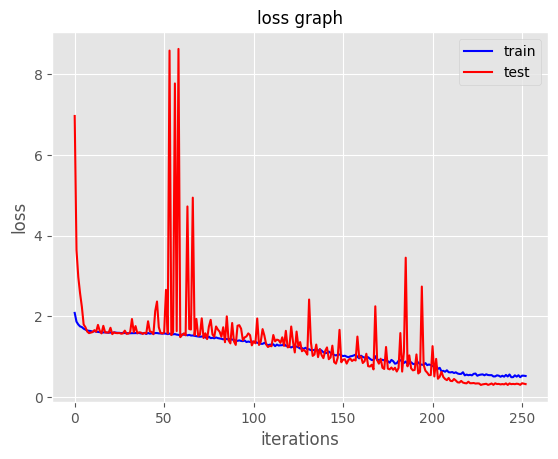

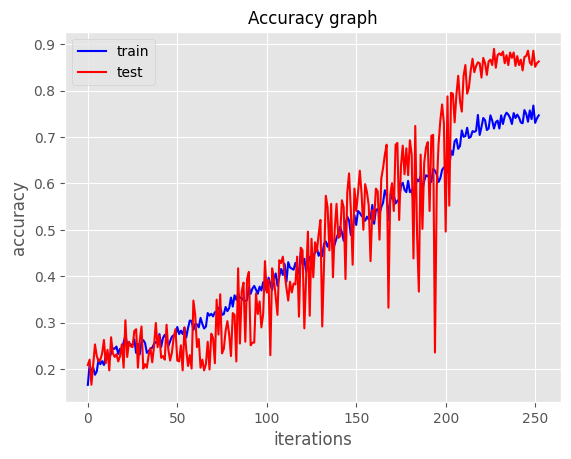

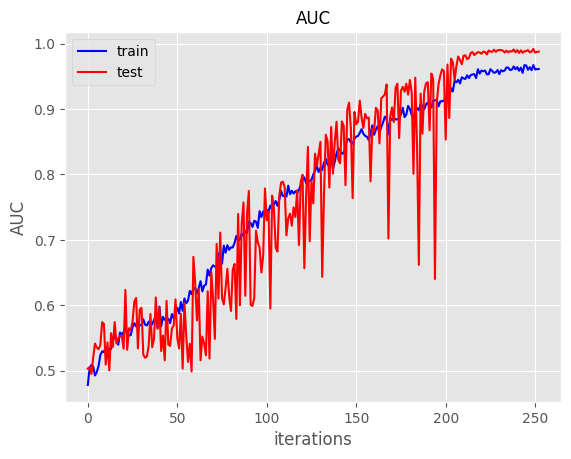

In [56]:
plot_model_perfomance(history)

In [67]:
vgg19_logs_csv = pd.DataFrame(history.history)

In [69]:
vgg19_logs_csv.to_csv('vgg19_logs_csv')

In [53]:
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary predictions
    true_positives = tf.reduce_sum(y_true * y_pred, axis=0)
    predicted_positives = tf.reduce_sum(y_pred, axis=0)
    actual_positives = tf.reduce_sum(y_true, axis=0)

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())

    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)  # Handle NaN values
    return tf.reduce_mean(f1)

In [54]:
resnet50_model = load_model('/content/drive/MyDrive/Colab Notebooks/Resnet50_64%_rms.h5',custom_objects={'f1_score':f1_score})
vgg16_model    = load_model('/content/drive/MyDrive/Colab Notebooks/Vgg16_400.h5')

## Plot confusion metrics

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Vgg19

In [57]:
val_sample = val_data.as_numpy_iterator().next()

In [46]:
y_true = np.argmax(val_sample[1],axis=1)
y_pred = np.argmax((model.predict(val_sample[0])),axis=1)

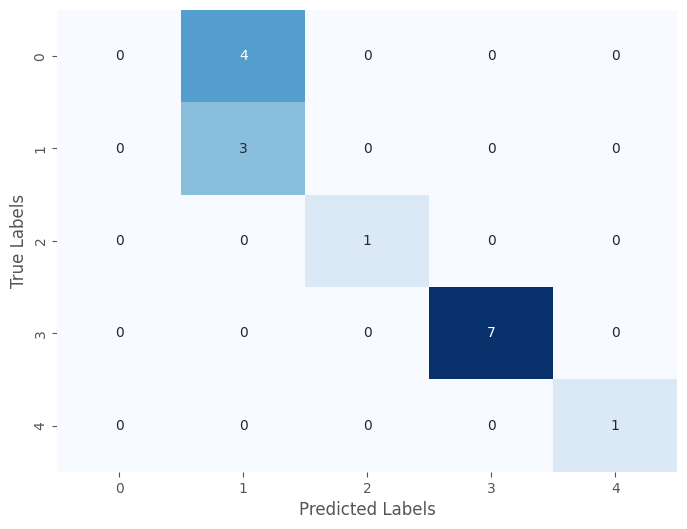

In [71]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix.png')
plt.show()

In [62]:
y_true_vgg16 = np.argmax(val_sample[1],axis=1)
y_pred_vgg16 = np.argmax((vgg16_model.predict(val_sample[0])),axis=1)

1/1 [==============================] - 0s 30ms/step


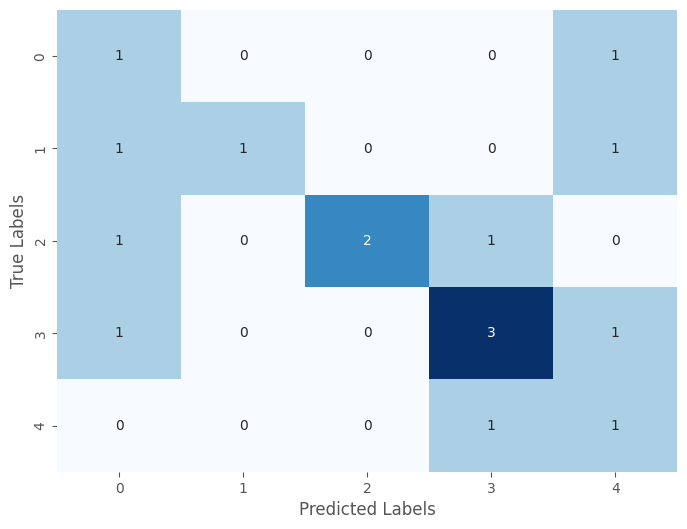

In [66]:
cm = confusion_matrix(y_true_vgg16, y_pred_vgg16)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_vgg16.png')
plt.show()

## Classification Report

In [49]:
class_names = [0,1,2,3,4]

In [51]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)#, target_names=class_names)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1

    accuracy                           0.75        16
   macro avg       0.69      0.80      0.72        16
weighted avg       0.64      0.75      0.68        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
report_vgg16 = classification_report(y_true_vgg16, y_pred_vgg16)#, target_names=class_names)
print(report_vgg16)

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       1.00      0.33      0.50         3
           2       1.00      0.50      0.67         4
           3       0.60      0.60      0.60         5
           4       0.25      0.50      0.33         2

    accuracy                           0.50        16
   macro avg       0.62      0.49      0.49        16
weighted avg       0.69      0.50      0.53        16



## Save vgg19 model

In [70]:
# save weights
model.save('vgg19_model.h5')

## Resnet model perfomance

In [72]:
def Normalization_res(image,level):

    image   = tf.image.resize(image,(256,256))
    mean_per_channel = tf.reduce_mean(image, axis=(0, 1))
    std_per_channel  = tf.math.reduce_std(image,axis=(0,1))

    epsilon = 1e-8
    std_per_channel = tf.maximum(std_per_channel, epsilon)

    # Normalize each channel by subtracting its respective channel mean from each pixel value
    normalized_rgb_image = image - mean_per_channel
    normalized_rgb_image = normalized_rgb_image/std_per_channel

    return normalized_rgb_image,level

In [82]:
def preprocess_res(image_path, level):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (256, 256))  # Adjust dimensions
    image = image / 255.0  # Normalize pixel values

    nor_image,level = Normalization_res(image,level)
    return nor_image, level

In [83]:
data_res = tf.data.Dataset.from_tensor_slices((image_path, level))
data_res = data_res.shuffle(buffer_size=12452)
data_res = data_res.map(preprocess_res)
data_res = data_res.batch(16)
data_res = data_res.prefetch(tf.data.AUTOTUNE)

In [84]:
sample_res_data = data_res.take(77)

In [86]:
sample_res = sample_res_data.as_numpy_iterator().next()

In [85]:
data_res.as_numpy_iterator().next()[0].shape

(16, 256, 256, 3)

In [87]:
y_true_res = np.argmax(sample_res[1],axis=1)
y_pred_res = np.argmax((resnet50_model.predict(sample_res[0])),axis=1)

1/1 [==============================] - 1s 1s/step


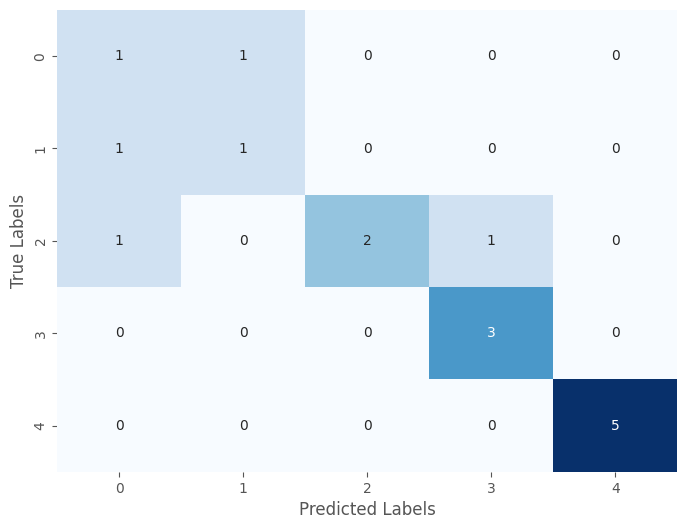

In [88]:
cm = confusion_matrix(y_true_res, y_pred_res)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_resnet50.png')
plt.show()

In [89]:
report_resnet50 = classification_report(y_true_res, y_pred_res)#, target_names=class_names)
print(report_resnet50)

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.50      0.50      0.50         2
           2       1.00      0.50      0.67         4
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         5

    accuracy                           0.75        16
   macro avg       0.72      0.70      0.68        16
weighted avg       0.81      0.75      0.75        16



In [96]:
vgg19_model = load_model('/content/vgg19_model.h5')